In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 25.3MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
import numpy as np

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (224, 224)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (224, 224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [12]:
# Build the model using MobileNetV2 as the base
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,380,866 (70.12 MB)

 Trainable params: 16,122,882 (61.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.9450 - loss: 1.0697 - val_accuracy: 0.9790 - val_loss: 0.0906
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 65ms/step - accuracy: 0.9710 - loss: 0.1823 - val_accuracy: 0.9748 - val_loss: 0.0668
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9732 - loss: 0.1197 - val_accuracy: 0.9770 - val_loss: 0.0823
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.9724 - loss: 0.1086 - val_accuracy: 0.9762 - val_loss: 0.0575
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.9746 - loss: 0.0730 - val_accuracy: 0.9758 - val_loss: 0.0724
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9750 - loss: 0.1026 - val_accuracy: 0.9786 - val_loss: 0.0986
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9790 - loss: 0.0711 - val_accuracy: 0.9772 - val_loss: 0.0661
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9760 - loss: 0.0849 - 

In [16]:
avg_accuracy = np.mean(history.history['accuracy'])
print(f"Average training accuracy: {avg_accuracy}")

Average training accuracy: 0.9722450017929077


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions on the validation set
y_pred = model.predict(val_ds)
y_pred = (y_pred > 0.5).astype(int)

# Get true labels from the validation set
y_true = []
for images, labels in val_ds:
  y_true.extend(labels.numpy())

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
Precision: 0.508
Recall: 0.508
F1-score: 0.508


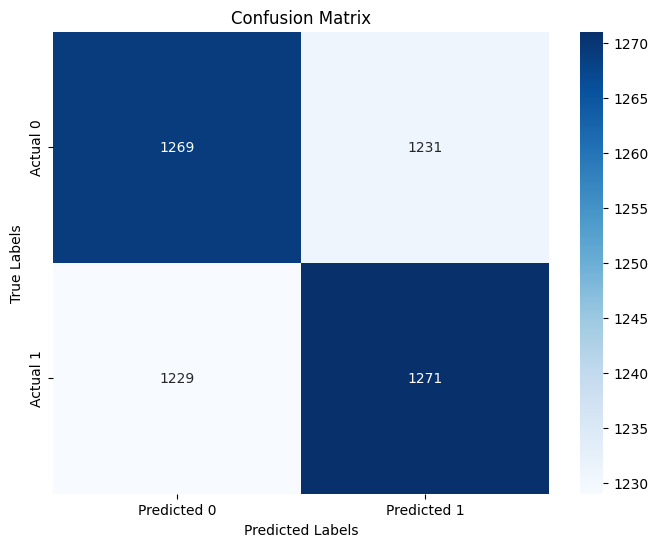

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert y_true to a NumPy array and extract the class labels
y_true = np.array(y_true)  # Convert list to NumPy array
y_true = np.argmax(y_true, axis=1)  # Get class labels from one-hot encoding

# Convert y_pred to class labels
y_pred = np.argmax(y_pred, axis=1)  # Get class labels from predictions

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

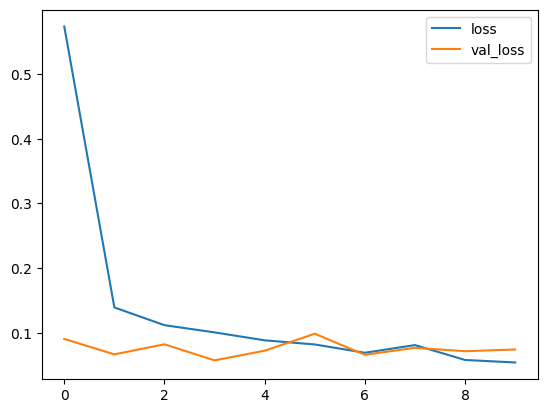

In [22]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();